In [104]:
import pandas as pd
import numpy as np

In [105]:
pd.set_option('display.max_columns', None)

In [106]:
faults = pd.read_csv('../data/J1939Faults.csv', low_memory=False)
fault_codes = pd.read_excel('../data/Service Fault Codes.xlsx')
diagnostic_data = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv')

clean data

In [107]:
# Define the service locations
service_locations = [(36.0666667, -86.4347222), (35.5883333, -86.4438888), (36.1950, -83.174722)]

# Filter out faults occurring within 1 mile of service locations
for loc in service_locations:
    lat_mile = 2/69 # Convert 1 mile to degrees of latitude
    lon_mile = 1/(69*np.cos(np.radians(loc[0]))) * 2 # Convert 1 mile to degrees of longitude at the given latitude
    faults = faults[(np.abs(faults['Latitude'] - loc[0]) > lat_mile) | (np.abs(faults['Longitude'] - loc[1]) > lon_mile)]

# Filter out faults where the EquipmentID has more than 5 characters
faults = faults[faults['EquipmentID'].str.len() <= 5]
faults

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000


In [108]:
wide_diag = diagnostic_data.pivot(index='FaultId', columns='Name', values='Value')

In [109]:
fault_diag = pd.merge(left = faults,
         right = wide_diag,
         left_on = 'RecordID',
         right_on = 'FaultId'
        )
fault_diag

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,111,17,True,2,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000,0,14.21,False,66.48672,423178.7,100.4,11,0,96.74375,0,1632.2,43.2,12300.907429328,0,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,629,12,True,127,NaN,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,False,127,NaN,1369,105336226,41.421250,-87.767361,2015-02-21 11:35:26.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,1807,2,True,127,NaN,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,4364,17,False,2,NaN,1674,105427130,38.416481,-89.442638,2015-02-21 11:39:37.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051207,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,1761,17,False,3,NaN,2282,105439740,37.094768,-85.897407,2020-03-06 14:00:21.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1051208,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1994,105354084,34.390740,-79.461805,2020-03-06 14:04:59.000,100,14.5,True,64.6226,423937.9,185,51,37.12,211.4937,1310.25,10722.7,96.4,58979.184415546,7.647805,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1051209,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,3216,10,True,1,NaN,1850,105336308,34.430370,-84.920509,2020-03-06 14:14:14.000,0,14.355,True,66.48672,465925.4,186.8,62,41.18,212.8438,1340.75,9326.75,100,65080.10587046,8.995086,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1051210,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,8,NaN,2377,108605700,35.030925,-85.321527,2020-03-06 14:14:49.000,1.6,14.4275,False,67.72946,28606.65625,181.4,0,27.26,221.7312,863.25,586.75,23.6,4042.49282573,0,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [110]:
derates=fault_diag.loc[fault_diag['spn'].isin([5246, 1569])]
full_derate = derates.loc[derates['spn'].isin([5246])]
full_derate

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
1786,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,5246,0,True,1,NaN,1630,105329900,40.733009,-74.087777,2015-02-23 05:08:23.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4645.45,NaN,33470.466902374,NaN,NaN,False,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
2574,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,NaN,1487,105369355,28.077361,-81.897083,2015-02-23 15:54:58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,True,1,NaN,1329,105400037,39.399583,-82.974768,2015-02-25 13:56:31.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN
5209,5810,1071907,2015-02-25 14:47:00.000,NaN,NaN,unknown,unknown,unknown,unknown,0,5246,0,False,1,NaN,1329,105400037,39.399629,-82.974814,2015-02-25 14:46:56.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
5922,6535,1097942,2015-02-26 22:24:29.000,NaN,NaN,04993120*00021657*082113134117*07700053*I0*BBZ*,79466573,6X1u10D1500000000,CMMNS,0,5246,0,True,1,NaN,1419,105355995,37.596805,-85.865555,2015-02-26 22:25:05.000,NaN,14.5,False,64.6226,441699.6,185,10,20.3,198.1625,648.125,9087.95,57.2,69605.769379298,0.6340149,NaN,True,140,22527,NaN,NaN,0,3276.75,NaN,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044449,1239564,119961467,2020-02-06 08:03:09.000,NaN,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,5246,0,False,1,NaN,1854,105385876,35.943472,-83.823240,2020-02-06 08:03:05.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
1046465,1241841,120905759,2020-02-13 13:32:39.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,0,True,1,NaN,1872,105301976,35.707268,-81.397037,2020-02-13 13:33:15.000,0,13.9925,False,57.78752,477486.8,197.6,10,21.46,204.9688,599.5,9344.3,72.4,63966.356499228,0.4623025,NaN,True,120.2,22527,True,NaN,0,NaN,100,0.58
1046479,1241858,120910417,2020-02-13 14:01:40.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,5246,0,False,1,NaN,1872,105301976,35.708101,-81.395648,2020-02-13 13:59:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1046712,1242137,121038018,2020-02-14 11:21:54.000,NaN,NaN,NaN,NaN,NaN,NaN,49,5246,19,True,88,NaN,302,105418777,38.349490,-85.708425,2020-02-14 11:22:30.000,0,14.79,False,0,334736.2,17.6,51,84.68,18.10625,651.5,11554.2,100,393.220099402,2.892693,19.4,True,26.6,255,True,NaN,0,NaN,0,0.58


In [111]:
# Extract unique EquipmentID numbers from full_derate
unique_equip_ids = full_derate['EquipmentID'].unique()

# Filter rows in fault_diag based on unique_equip_ids
fault_diag_filtered = fault_diag[fault_diag['EquipmentID'].isin(unique_equip_ids)]
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
9,10,990446,2015-02-21 11:41:55.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1417,105438630,33.039953,-96.182592,2015-02-21 11:41:51.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
10,11,990459,2015-02-21 11:42:19.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
13,14,990470,2015-02-21 11:43:40.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1582,105410980,40.161944,-80.161018,2015-02-21 11:43:36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
15,16,990495,2015-02-21 11:45:06.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,False,1,NaN,1601,105430420,38.272037,-78.937129,2015-02-21 11:45:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051183,1248429,123886552,2020-03-06 12:11:54.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,126,NaN,1853,105376821,26.079814,-80.123518,2020-03-06 12:11:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN
1051185,1248431,123891846,2020-03-06 12:20:36.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051186,1248432,123891847,2020-03-06 12:20:36.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92146675,0.7132668,32,True,143.6,1279,True,NaN,0,NaN,100,0.58
1051192,1248438,123893761,2020-03-06 12:51:53.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,126,NaN,1853,105376821,26.078888,-80.122361,2020-03-06 12:51:49.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65535,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
fault_diag_filtered = fault_diag_filtered[fault_diag_filtered['active'] == True]
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
5,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000,48,14.4275,False,64.6226,470381.4,181.4,30,38.28,196.5313,1514.5,9480,44,70349.809963756,4.583399,NaN,True,111.2,1023,NaN,NaN,13.6022,3276.75,NaN,6.67
10,11,990459,2015-02-21 11:42:19.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00184697*060712145341*07700027*I0*BBZ*,79618845,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1582,105410980,40.158055,-80.151018,2015-02-21 11:42:55.000,NaN,14.1375,False,64.6226,257885.9,181.4,80,34.22,218.975,1382.375,5085.35,42.8,37724.957799834,13.72378,NaN,True,78.8,1023,NaN,NaN,64.82649,3276.75,NaN,17.69
16,17,990504,2015-02-21 11:45:14.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00190002*082113134117*07700053*I0*BBZ*,79623056,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1601,105430420,38.279629,-78.935509,2015-02-21 11:45:51.000,37.2,14.1375,False,66.48672,268575.9,183.2,26,33.64,217.2875,1035.5,5004.75,66,39450.13338542,2.166218,NaN,True,60.8,17407,NaN,NaN,36.38905,3276.75,NaN,1.16
23,29,990653,2015-02-21 11:53:52.000,Abnormal Update Rate Tire Location,NaN,unknown,unknown,unknown,unknown,49,929,9,True,126,NaN,1605,105415080,37.521898,-85.881759,2015-02-21 11:54:29.000,0,14.21,False,66.48672,231667.7,168.8,13,26.1,204.4063,599.875,4378.65,NaN,32180.911030536,0.594389,32,True,96.8,1279,True,NaN,0,3276.75,0,0.29
28,35,990771,2015-02-21 12:01:10.000,Low (Severity Low) Engine Coolant Level,NaN,04993120*00187677*082113134117*07700053*I0*BBZ*,79619763,6X1u10D1500000000,CMMNS,0,111,17,True,1,NaN,1585,105443412,38.904675,-85.823657,2015-02-21 12:01:53.000,56.8,14.355,False,66.48672,319674.2,186.8,52,34.8,220.2688,1386.5,5791.95,29.2,48822.165274224,12.0727,NaN,True,82.4,1023,NaN,NaN,65.20514,3276.75,NaN,19.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051154,1248395,123872855,2020-03-06 10:46:24.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,25.994953,-80.182175,2020-03-06 10:57:23.000,0,14.645,False,66.48672,443424,185,12,24.94,193.8313,600.625,10755.3,68.8,62061.94017636,0.7264754,32,True,136.4,1279,True,NaN,0,NaN,100,0.29
1051179,1248425,123884064,2020-03-06 12:00:41.000,High Voltage (Left Fuel Level Sensor),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,126,NaN,1853,105376821,26.080324,-80.124166,2020-03-06 12:01:17.000,0,14.645,False,66.48672,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,True,NaN,0,NaN,100,0.58
1051180,1248426,123884065,2020-03-06 12:00:41.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.080324,-80.124166,2020-03-06 12:01:17.000,0,14.645,False,66.48672,443434.3,185,17,22.04,208.7937,599.625,10755.7,50.4,62063.657294698,0.7528927,32,True,141.8,1279,True,NaN,0,NaN,100,0.58
1051185,1248431,123891846,2020-03-06 12:20:36.000,High Voltage (Fuel Level),NaN,NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,126,NaN,1853,105376821,26.078518,-80.122268,2020-03-06 12:41:17.000,0,14.645,False,66.48672,443434.9,186.8,12,22.62,203.7875,601,10755.85,54,62063.92

In [113]:
fault_diag_filtered = fault_diag_filtered.sort_values(by=['EquipmentID','EventTimeStamp'], ascending=[True, True])

drop columns

In [114]:
fault_diag_filtered = fault_diag_filtered.drop(columns=['ParkingBrake','LocationTimeStamp','active','CruiseControlActive', 'CruiseControlSetSpeed', 'MCTNumber', 'ecuSoftwareVersion', 'ecuSerialNumber','actionDescription', 'faultValue', 'ServiceDistance', 'SwitchedBatteryVoltage', 'ecuSource'])
fault_diag_filtered['EventTimeStamp'] = pd.to_datetime(fault_diag_filtered['EventTimeStamp'])
fault_diag_filtered = fault_diag_filtered.replace(',', '.', regex=True)
fault_diag_filtered

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,NaN,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08,NaN,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [115]:
# Create a groupby object using the 'EquipmentID' column
groups = fault_diag_filtered.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.ffill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated = pd.concat([interpolate_group(group) for _, group in groups])
interpolated

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,NaN,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5115,5714,1070646,2015-02-25 13:53:08,NaN,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [116]:
# Create a groupby object using the 'EquipmentID' column
groups = interpolated.groupby('EquipmentID')

# Define a function to apply to each group to interpolate missing values using ffill
def interpolate_group(group):
    return group.bfill()

# Apply the function to each group and concatenate the results back into a single DataFrame
interpolated_bfill = pd.concat([interpolate_group(group) for _, group in groups])
interpolated_bfill

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,22527,0,NaN,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,NaN,True,100.4,17407,0,NaN,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [117]:
interpolated_bfill = interpolated_bfill.bfill()

# Define columns to impute with mode
cols_to_impute = ['ecuModel', 'ecuMake', 'AcceleratorPedal', 'EngineTimeLtd', 'FuelLevel', 'FuelTemperature', 'Throttle']

# Group by EquipmentID and impute missing values with mode
grouped = interpolated_bfill.groupby('EquipmentID')[cols_to_impute].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Update the original DataFrame with imputed values
interpolated_bfill[cols_to_impute] = grouped[cols_to_impute]
interpolated_bfill

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,22527,0,0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,3242,15,1,1329,39.399583,-82.974861,0,14.2825,483744.4,204.8,34,22.62,220.7188,898.375,9337,70,72585.630125858,5.111745,183.2,True,100.4,17407,0,0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,829,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,192.2,14,22.62,197.0375,600.25,9910.9,0,43539.384664354,0.5679717,32,True,156.2,1279,0,0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,96,3,126,306,36.319259,-86.705000,0,14.4275,312451.9,185,14,22.04,201.4812,599.625,9910.95,0,43539.384664354,0.5679717,32,True,154.4,1279,0,0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,639,2,127,306,36.183287,-86.274675,28,14.4275,317407.4,183.2,20,35.38,204.8562,988.875,10177.25,69.2,44309.182023882,1.902045,32,True,95,1279,4.796209,0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,3216,9,1,306,35.992685,-86.538287,0,14.355,320867.1,181.4,0,37.7,210.9875,1173.375,10429.75,83.6,44890.888882386,0,32,True,80.6,17407,42.00081,0,2.9


In [118]:
int_cols = ["AcceleratorPedal", "BarometricPressure", "DistanceLtd", "EngineCoolantTemperature", "EngineLoad",
            "EngineOilPressure", "EngineOilTemperature", "EngineRpm", "EngineTimeLtd", "FuelLevel", "FuelLtd",
            "FuelRate", "FuelTemperature", "IntakeManifoldTemperature", "Speed", "Throttle",
            "TurboBoostPressure"]

# convert columns to int64
interpolated_bfill[int_cols] = interpolated_bfill[int_cols].astype("float")

In [119]:
equipment_ids_to_drop = ['302', '1878', '1585', '1961', '2007']
interpolated_drop = interpolated_bfill[~interpolated_bfill['EquipmentID'].isin(equipment_ids_to_drop)]
interpolated_drop

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63
5296,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407,0.000000,0.0,13.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931529,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279,0.000000,0.0,0.29
931528,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279,0.000000,0.0,0.58
946239,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279,4.796209,0.0,0.58
961868,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,3216,9,1,306,35.992685,-86.538287,0.0,14.3550,320867.1,181.4,0.0,37.70,210.9875,1173.375,10429.75,83.6,44890.888882,0.000000,32.0,True,80.6,17407,42.000810,0.0,2.90


In [120]:
def mileage_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_mileage = eq_df['DistanceLtd'].iloc[0]
        spn_mileage = eq_df.loc[eq_df['spn'] == 5246, 'DistanceLtd'].iloc[0]
        result.append((eq_id, spn_mileage - earliest_mileage))
    return result

mileage_to_spn_df = pd.DataFrame(mileage_to_spn(interpolated_drop), columns=['EquipmentID', 'mileage_to_spn'])
# calculate the mean excluding rows where value is zero
overall_avg_mileage = mileage_to_spn_df.loc[mileage_to_spn_df['mileage_to_spn'] != 0, 'mileage_to_spn'].mean()
mileage_to_spn_df['overall_avg_mileage'] = overall_avg_mileage

def time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_timestamp = eq_df['EventTimeStamp'].iloc[0]
        spn_timestamp = eq_df.loc[eq_df['spn'] == 5246, 'EventTimeStamp'].iloc[0]
        result.append((eq_id, spn_timestamp - earliest_timestamp))
    return result

time_to_spn_df = pd.DataFrame(time_to_spn(interpolated_drop), columns=['EquipmentID', 'time_to_spn'])
overall_avg_time = time_to_spn_df.loc[time_to_spn_df['time_to_spn'] != pd.Timedelta(0), 'time_to_spn'].mean()
time_to_spn_df['overall_avg_time'] = overall_avg_time

def eng_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_eng_time = eq_df['EngineTimeLtd'].iloc[0]
        spn_eng_time = eq_df.loc[eq_df['spn'] == 5246, 'EngineTimeLtd'].iloc[0]
        result.append((eq_id, spn_eng_time - earliest_eng_time))
    return result

eng_time_to_spn_df = pd.DataFrame(eng_time_to_spn(interpolated_drop), columns=['EquipmentID', 'eng_time_to_spn'])
overall_avg_eng_time = eng_time_to_spn_df.loc[eng_time_to_spn_df['eng_time_to_spn'] != 0, 'eng_time_to_spn'].mean()
eng_time_to_spn_df['overall_avg_eng_time'] = overall_avg_eng_time

def fuel_time_to_spn(interpolated_drop):
    result = []
    for eq_id, eq_df in interpolated_drop.groupby('EquipmentID'):
        earliest_fuel_time = eq_df['FuelLtd'].iloc[0]
        spn_fuel_time = eq_df.loc[eq_df['spn'] == 5246, 'FuelLtd'].iloc[0]
        result.append((eq_id, spn_fuel_time - earliest_fuel_time))
    return result

fuel_time_to_spn_df = pd.DataFrame(fuel_time_to_spn(interpolated_drop), columns=['EquipmentID', 'fuel_time_to_spn'])
overall_avg_fuel_time = fuel_time_to_spn_df.loc[fuel_time_to_spn_df['fuel_time_to_spn'] != 0, 'fuel_time_to_spn'].mean()
fuel_time_to_spn_df['overall_avg_fuel_time'] = overall_avg_fuel_time

merged_df = pd.merge(interpolated_drop, mileage_to_spn_df, on='EquipmentID')
merged_df = pd.merge(merged_df, time_to_spn_df, on='EquipmentID')
merged_df = pd.merge(merged_df, eng_time_to_spn_df, on='EquipmentID')
merged_df = pd.merge(merged_df, fuel_time_to_spn_df, on='EquipmentID')
merged_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,mileage_to_spn,overall_avg_mileage,time_to_spn,overall_avg_time,eng_time_to_spn,overall_avg_eng_time,fuel_time_to_spn,overall_avg_fuel_time
0,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63,0.0,176549.815922,0 days 00:00:00,568 days 03:57:53.977900560,0.00,3895.592486,0.000000,24752.103849
1,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63,0.0,176549.815922,0 days 00:00:00,568 days 03:57:53.977900560,0.00,3895.592486,0.000000,24752.103849
2,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63,0.0,176549.815922,0 days 00:00:00,568 days 03:57:53.977900560,0.00,3895.592486,0.000000,24752.103849
3,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.000000,0.0,13.63,0.0,176549.815922,0 days 00:00:00,568 days 03:57:53.977900560,0.00,3895.592486,0.000000,24752.103849
4,5899,1073059,2015-02-25 15:38:07,High (Severity Low) Aftertreatment 1 Particula...,unknown,unknown,3242,15,1,1329,39.399583,-82.974861,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,17407,0.000000,0.0,13.63,0.0,176549.815922,0 days 00:00:00,568 days 03:57:53.977900560,0.00,3895.592486,0.000000,24752.103849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171303,1088628,70128153,2018-12-03 10:37:20,High Voltage (Left Fuel Level Sensor),unknown,unknown,829,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,192.2,14.0,22.62,197.0375,600.250,9910.90,0.0,43539.384664,0.567972,32.0,True,156.2,1279,0.000000,0.0,0.29,193243.3,176549.815922,1225 days 09:45:47,568 days 03:57:53.977900560,7191.85,3895.592486,27359.771082,24752.103849
171304,1088627,70128152,2018-12-03 10:37:31,High Voltage (Fuel Level),unknown,unknown,96,3,126,306,36.319259,-86.705000,0.0,14.4275,312451.9,185.0,14.0,22.04,201.4812,599.625,9910.95,0.0,43539.384664,0.567972,32.0,True,154.4,1279,0.000000,0.0,0.58,193243.3,176549.815922,1225 days 09:45:47,568 days 03:57:53.977900560,7191.85,3895.592486,27359.771082,24752.103849
171305,1108656,74595473,2019-01-18 07:56:44,Incorrect Data J1939 Network #1 Primary Vehicl...,EC60-adv,BNDWS,639,2,127,306,36.183287,-86.274675,28.0,14.4275,317407.4,183.2,20.0,35.38,204.8562,988.875,10177.25,69.2,44309.182024,1.902045,32.0,True,95.0,1279,4.796209,0.0,0.58,193243.3,176549.815922,1225 days 09:45:47,568 days 03:57:53.977900560,7191.85,3895.592486,27359.771082,24752.103849
171306,1127904,78803617,2019-02-28 08:27:34,Abnormal Update Rate Aftertreatment 1 Intake NOx,6X1u13D1500000000,CMMNS,3216,9,1,306,35.992685,-86.538287,0.0,14.3550,320867.1,181.4,0.0,37.70,210.9875,1173.375,10429.75,83.6,44890.888882,0.000000,32.0,True,80.6,17407,42.000810,0.0,2.90,193243.3,176549.815922,1225 days 09:45:47,568 

In [121]:
# find the first occurrence of spn = 5246 for each EquipmentID
earliest_timestamps = interpolated_drop.loc[interpolated_drop['spn'] == 5246] \
    .groupby('EquipmentID')['EventTimeStamp'].first()

# create a new column with the time difference in hours between each row and the first occurrence of spn = 5246 for each EquipmentID
interpolated_drop['time_diff'] = (interpolated_drop['EventTimeStamp'] - interpolated_drop['EquipmentID'].map(earliest_timestamps)) \
    .dt.total_seconds() / 3600

# filter the dataframe to keep only the rows where the time difference is less than or equal to 8 hours
filtered_df = interpolated_drop.loc[(interpolated_drop['EquipmentID'].isin(earliest_timestamps.index)) 
    & (interpolated_drop['time_diff'] >= -24)
    & (interpolated_drop['time_diff'] <= 0)]
filtered_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000
74203,84717,2909659,2015-06-11 16:56:54,Condition Exists Cruise Control Enable Switch,unknown,unknown,50353,0,2,1339,38.392546,-82.422546,0.0,14.2100,581309.0,185.0,13.0,16.24,209.4688,649.625,11008.00,54.8,89147.236496,0.726475,183.2,True,165.2,2,0.00000,0.0,0.58,-22.641111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278167,311407,6322249,2015-12-14 18:25:46,Special Instructions Maximum Vehicle Speed Limit,unknown,unknown,5246,19,3,305,35.196203,-85.814722,0.0,13.7750,191889.2,197.6,0.0,130.50,222.4063,1626.500,4195.90,76.8,29591.232405,0.000000,104.0,True,113.0,255,46.49119,0.0,28.71,0.000000
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407,65.39931,30.4,0.87,-5.616944
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431,64.72940,0.0,21.46,-5.565833
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431,0.00000,0.0,0.58,-4.593056


In [122]:
filtered_df.groupby(['spn', 'fmi', 'eventDescription']).size().reset_index(name='count').sort_values('count', ascending=False).head(40)

,spn,fmi,eventDescription,count
30,1569,31,Condition Exists Engine Protection Torque Derate,200
9,96,3,High Voltage (Fuel Level),169
12,111,17,Low (Severity Low) Engine Coolant Level,140
109,5246,0,Condition Exists Engine Protection Torque Derate,113
25,829,3,High Voltage (Left Fuel Level Sensor),106
40,1761,19,Data May Be Invalid Catalyst Tank Level,42
35,1761,9,Abnormal Update Rate Catalyst Tank Level,38
65,3362,31,Condition Exists Catalyst Dosing Unit Input Lines,35
67,3364,9,Abnormal Update Rate Catalyst Tank Reagent Qua...,34
28,929,9,Abnormal Update Rate Tire Location,29


In [123]:
# Create target column with spn, fmi combos
def check_spn_fmi(row):
    spn_fmi_pairs = [
        (1569, 31), (4094, 18), (3362, 31), (5394, 17),
        (1761, 19), (1761, 9), (5394, 5), (3364, 9),
        (3216, 9), (6802, 31), (3031, 9), (3226, 9),
        (929, 9), (96, 3), (74, 14), (1068, 2),
        (5742, 9), (1787, 11), (5743, 9), (829, 3),
        (3216, 4), (4094, 31)
    ]
    spn = row['spn']
    fmi = row['fmi']
    if (spn, fmi) in spn_fmi_pairs:
        return 1
    else:
        return 0

filtered_df['target'] = filtered_df.apply(check_spn_fmi, axis=1)
filtered_df

,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuModel,ecuMake,spn,fmi,activeTransitionCount,EquipmentID,Latitude,Longitude,AcceleratorPedal,BarometricPressure,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,Speed,Throttle,TurboBoostPressure,time_diff,target
5114,5713,1070644,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,4344,5,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000,0
5115,5714,1070646,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,5246,0,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000,0
5116,5715,1070647,2015-02-25 13:53:08,Condition Exists Engine Protection Torque Derate,unknown,unknown,1569,31,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000,1
5117,5716,1070648,2015-02-25 13:53:08,Low (Severity Medium) Catalyst Tank Temperature,unknown,unknown,3031,18,1,1329,39.399583,-82.974768,0.0,14.2825,483744.4,204.8,34.0,22.62,220.7188,898.375,9337.00,70.0,72585.630126,5.111745,183.2,True,100.4,22527,0.00000,0.0,13.63,0.000000,0
74203,84717,2909659,2015-06-11 16:56:54,Condition Exists Cruise Control Enable Switch,unknown,unknown,50353,0,2,1339,38.392546,-82.422546,0.0,14.2100,581309.0,185.0,13.0,16.24,209.4688,649.625,11008.00,54.8,89147.236496,0.726475,183.2,True,165.2,2,0.00000,0.0,0.58,-22.641111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278167,311407,6322249,2015-12-14 18:25:46,Special Instructions Maximum Vehicle Speed Limit,unknown,unknown,5246,19,3,305,35.196203,-85.814722,0.0,13.7750,191889.2,197.6,0.0,130.50,222.4063,1626.500,4195.90,76.8,29591.232405,0.000000,104.0,True,113.0,255,46.49119,0.0,28.71,0.000000,0
905731,1053620,60904453,2018-09-07 05:45:39,Data Drifted High Aftertreatment 1 Outlet NOx,6X1u13D1500000000,CMMNS,3226,20,1,306,36.167777,-86.529120,0.0,14.4275,303989.6,183.2,13.0,38.86,214.3062,1327.375,9388.30,64.0,42183.917866,1.492577,32.0,True,104.0,17407,65.39931,30.4,0.87,-5.616944,0
905733,1053622,60904613,2018-09-07 05:48:43,Condition Exists NOx limits exceeded due to In...,6X1u13D1500000000,CMMNS,4094,31,1,306,36.169907,-86.587731,0.0,14.4275,303992.9,185.0,85.0,38.28,212.2813,1319.750,9388.35,62.8,42184.182038,15.480530,32.0,True,116.6,18431,64.72940,0.0,21.46,-5.565833,1
905745,1053642,60909415,2018-09-07 06:47:05,Condition Exists Engine Protection Torque Derate,6X1u13D1500000000,CMMNS,1569,31,1,306,36.173240,-86.776990,0.0,14.5000,304007.1,183.2,14.0,23.20,193.3813,599.125,9389.15,67.2,42186.163328,0.515137,32.0,True,145.4,18431,0.00000,0.0,0.58,-4.593056,1


In [125]:
ml_features = filtered_df.drop(columns=['LampStatus','eventDescription','EventTimeStamp','RecordID', 'ESS_Id','EquipmentID','spn','fmi', 'activeTransitionCount', 'Latitude', 'Longitude', 'time_diff'], axis=1)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1049, 21)"
4,Transformed data shape,"(1049, 31)"
5,Transformed train set shape,"(734, 31)"
6,Transformed test set shape,"(315, 31)"
7,Ordinal features,1
8,Numeric features,17
9,Categorical features,3


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:30:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


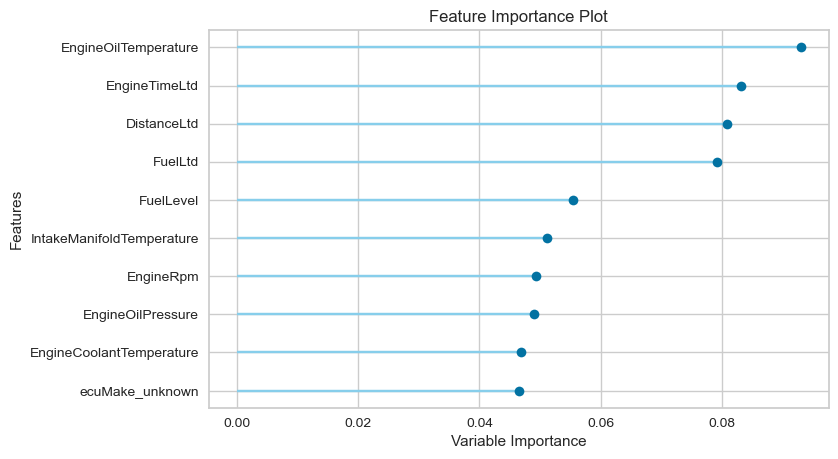

In [126]:
from pycaret.classification import *

# create time series split
split = int(len(ml_features)*0.8)
train_data = ml_features[:split]
test_data = ml_features[split:]

# setup pycaret
clf = setup(data=train_data, target='target', session_id=123, fold_strategy='timeseries')

# train model
#model = create_model('gbc')
best_model = compare_models()
#models_to_exclude = ['lightgbm']

#model=compare_models(exclude=models_to_exclude)

# plot feature importance
plot_model(best_model, plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

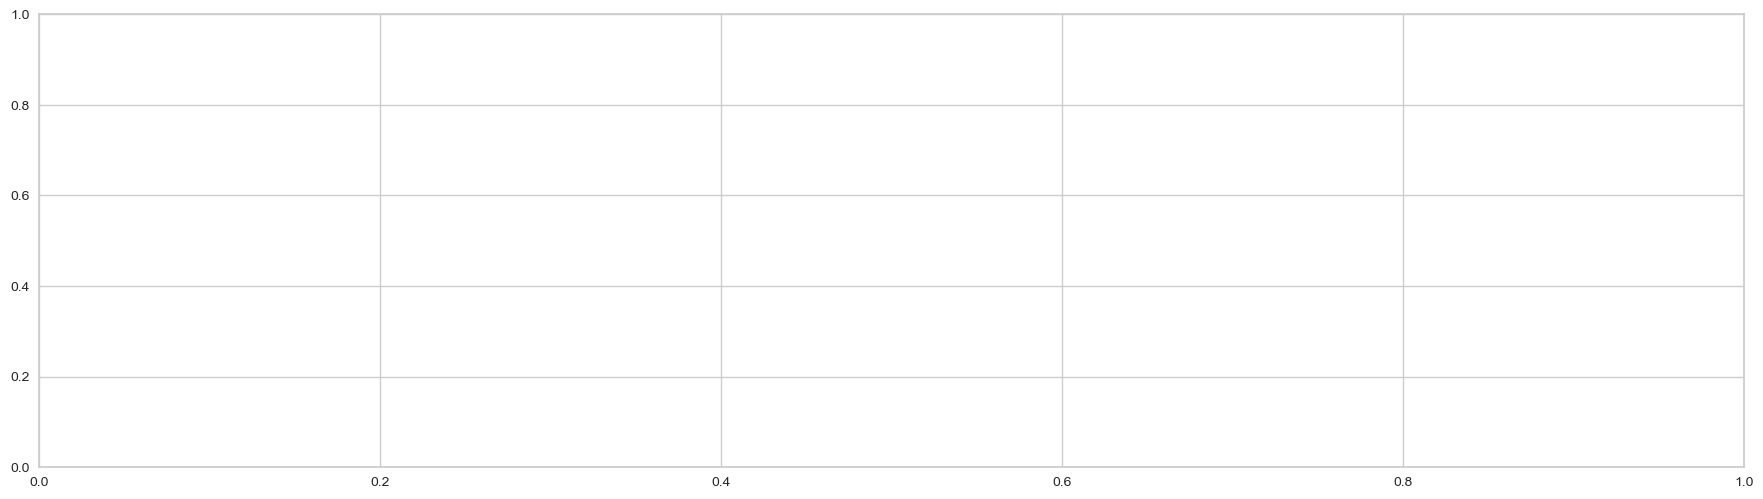

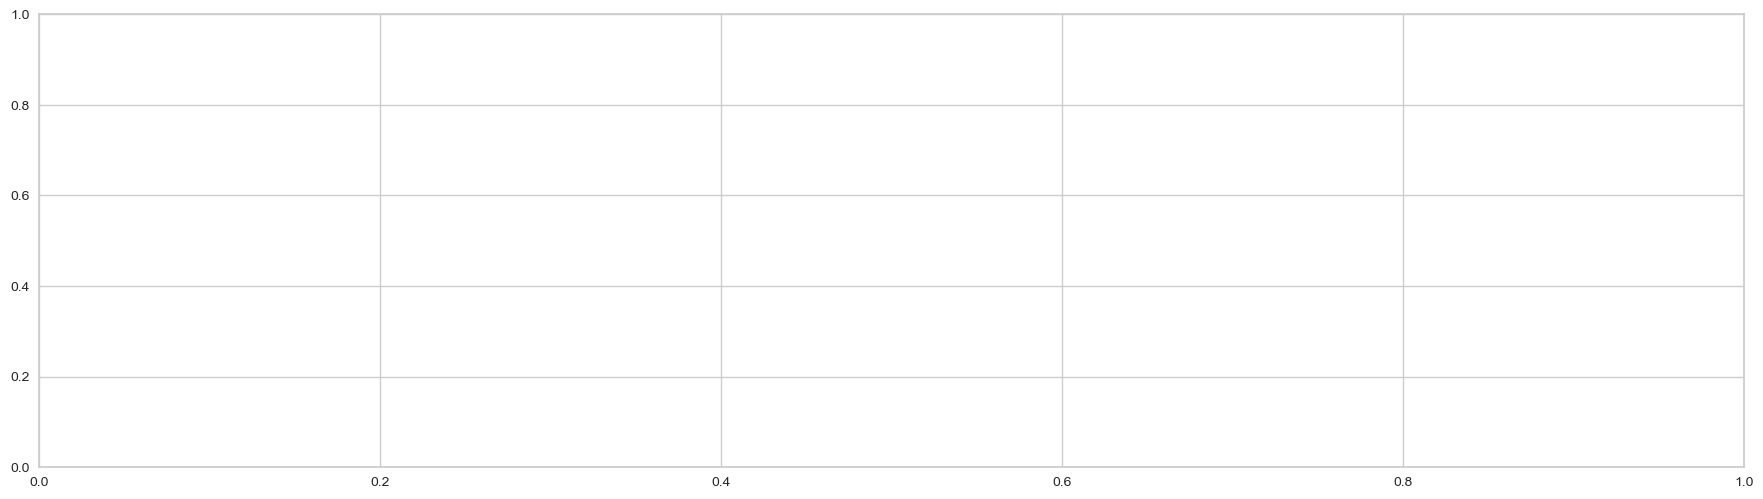

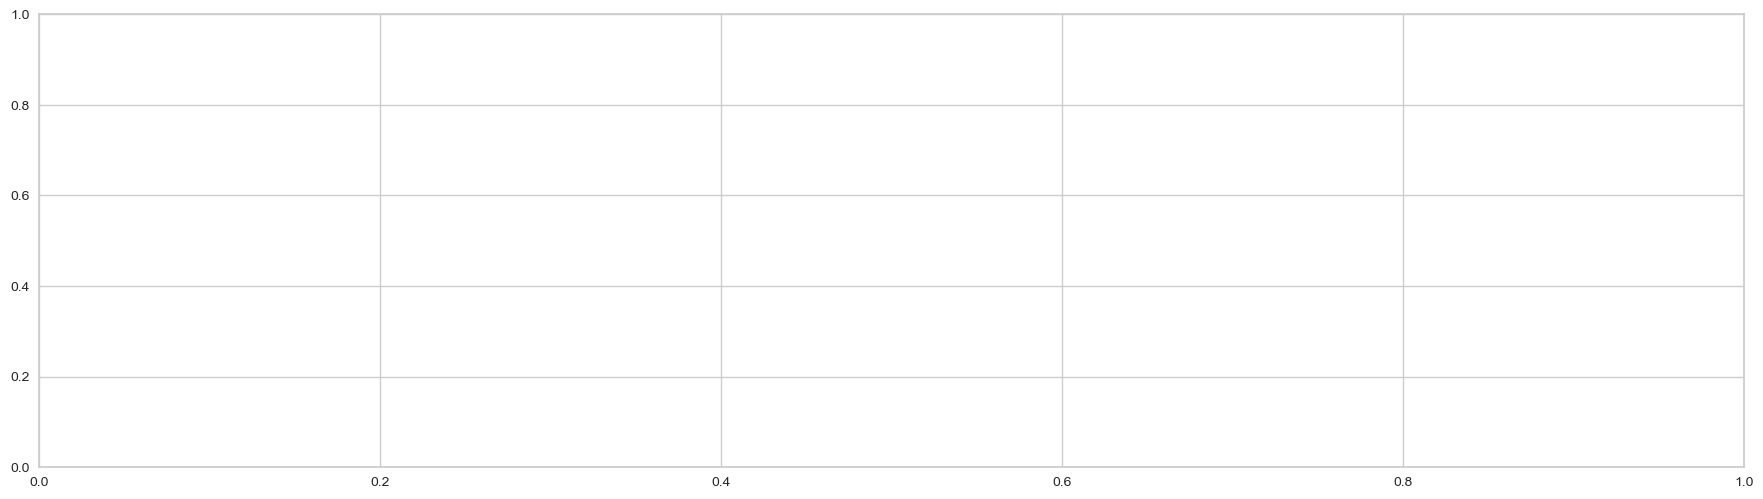

In [129]:
evaluate_model(best_model)